# Diseño y entrenamiento de modelos clasicos y modernos

Grupo: 1

Estudiantes:

-Constanza Olivos Fernandez

-Javier Nanco Becerra

-Nicolás Pozo Villagrán

Fecha: 21-09-2025

Version: 1.0

## Objetivos del notebook

En este notebook se realiza el diseño, entrenamiento y evaluación de modelos clásicos y modernos de machine learning aplicados al análisis del rendimiento de cultivos de trigo. Se utiliza un dataset preprocesado que incluye variables climáticas, de suelo y de manejo agrícola.

Se comienza con la preparación de los datos, incluyendo codificación de variables categóricas, escalado y división en conjuntos de entrenamiento, validación y prueba. Luego se implementan modelos clásicos, como regresión lineal, Ridge, Lasso, árboles de decisión, Random Forest, SVR y KNN, y modelos modernos, como XGBoost, LightGBM y CatBoost.

Para cada modelo se calculan métricas de desempeño relevantes para regresión (R², RMSE, MAE, MAPE) y se realiza un análisis de residuos, con gráficos que permiten visualizar la calidad de las predicciones y la distribución de los errores. Todos los modelos, scaler y gráficos se guardan en carpetas organizadas, facilitando la documentación y comparación de resultados.

El objetivo principal es identificar qué enfoques predictivos son más precisos y confiables para estimar el rendimiento de los cultivos, así como entender cómo las variables influyen en las predicciones, sirviendo de apoyo a la toma de decisiones agrícolas.

## Modelos Clásicos

En esta sección se implementan y evalúan modelos clásicos de regresión y aprendizaje supervisado para predecir el rendimiento de trigo. Se incluyen modelos lineales como Regresión Lineal, Ridge y Lasso, así como algoritmos no lineales como Árbol de Decisión, Random Forest, SVR y KNN.

Los datos se preparan mediante escalado y codificación de variables categóricas, y se dividen en conjuntos de entrenamiento, validación y prueba. Cada modelo se entrena, se guardan los modelos entrenados, y se realiza un análisis de residuos para visualizar la dispersión de los errores de predicción y evaluar la adecuación de cada modelo.

Los gráficos generados permiten comparar el desempeño y entender qué modelos capturan mejor las relaciones entre las variables de entrada y el rendimiento del cultivo.

In [1]:
# !pip install pytorch-tabnet
# !pip install scikit-learn
# !pip install shap

# ===========================
# Análisis de residuos - Modelos Clásicos
# ===========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import os
import joblib  # Para guardar modelos y scaler

# ===========================
# 1. Cargar dataset desde la carpeta 'csv'
# ===========================
csv_path = os.path.join('csv', 'features_trigo.csv')
df = pd.read_csv(csv_path)
print("✅ Dataset 'features_trigo.csv' cargado desde la carpeta 'csv'.")

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("Rendimiento_kg_ha", axis=1)
y = df_encoded["Rendimiento_kg_ha"]

# División 70/15/15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Crear carpetas si no existen
os.makedirs("modelos", exist_ok=True)
os.makedirs("images", exist_ok=True)

# Guardar el scaler
scaler_filename = "modelos/scaler.joblib"
joblib.dump(scaler, scaler_filename)
print(f"💾 StandardScaler guardado en: {scaler_filename}")

# ===========================
# 2. Definir modelos clásicos
# ===========================
modelos_clasicos = {
    "Regresión Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, max_iter=10000),
    "Lasso": Lasso(alpha=0.01, max_iter=10000),
    "Árbol": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel="rbf"),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# ===========================
# 3. Entrenar, guardar modelos y graficar residuos
# ===========================
for nombre, modelo in modelos_clasicos.items():
    # Entrenar modelo
    modelo.fit(X_train_scaled, y_train)
    
    # Guardar modelo entrenado en la carpeta 'modelos'
    modelo_filename = f"modelos/{nombre.replace(' ', '_')}.joblib"
    joblib.dump(modelo, modelo_filename)
    print(f"💾 Modelo guardado en: {modelo_filename}")
    
    # Predicciones y residuos
    y_pred = modelo.predict(X_test_scaled)
    residuos = y_test - y_pred
    
    # Gráfico residuos vs predichos
    plt.figure(figsize=(8,6))
    plt.scatter(y_pred, residuos, alpha=0.6, color="blue", edgecolor="k")
    plt.axhline(y=0, color="red", linestyle="--")
    plt.title(f"Análisis de residuos - {nombre}", fontsize=14)
    plt.xlabel("Valores predichos", fontsize=12)
    plt.ylabel("Residuos (y_real - y_predicho)", fontsize=12)
    plt.tight_layout()
    
    # Guardar gráfico
    plt.savefig(f"images/residuos_{nombre.replace(' ', '_')}.png", dpi=300)
    plt.show()
    
    print(f"📊 Gráfico de residuos generado para: {nombre}")


Los gráficos de residuos permiten evaluar la precisión y posibles sesgos de los modelos de regresión empleados para predecir el rendimiento del trigo. En los modelos lineales (Regresión Lineal, Ridge y Lasso), se observa heterocedasticidad: la dispersión de los residuos aumenta a medida que los valores predichos crecen, indicando que la precisión del modelo es desigual y funciona mejor para valores cercanos a la media.

Los modelos basados en árboles muestran comportamientos distintos: el Árbol de Regresión presenta un patrón escalonado típico de su estructura, con sesgo moderado en los valores altos, mientras que Random Forest genera residuos distribuidos de manera más uniforme alrededor de cero, reflejando menor sesgo y mayor consistencia en las predicciones.

Por su parte, SVR muestra una distribución relativamente aleatoria en los valores centrales, pero con acumulación de errores en los extremos, evidenciando sesgo en los rangos más altos y bajos. KNN, similar a Random Forest, mantiene residuos homogéneos y sin sesgo sistemático significativo.

En conjunto, Random Forest y KNN se destacan como los modelos más robustos, al presentar homocedasticidad y errores consistentes en todo el rango de valores, mientras que los modelos lineales y el Árbol de Regresión muestran limitaciones en la precisión predictiva, especialmente en valores extremos.

## Modelos modernos

En esta sección se implementan y evalúan modelos modernos de machine learning para la predicción del rendimiento de cultivos de trigo, incluyendo XGBoost, LightGBM y CatBoost. Estos modelos basados en árboles de decisión avanzados permiten capturar relaciones complejas y no lineales entre las variables climáticas, de suelo y de manejo agrícola.

Se realiza la preparación de los datos mediante escalado y codificación de variables categóricas, se entrenan los modelos con el conjunto de entrenamiento, y se calculan métricas de desempeño (R², RMSE, MAE, MAPE) sobre el conjunto de prueba. Además, se genera un análisis de residuos para evaluar visualmente la calidad de las predicciones y detectar posibles patrones de error.

Todos los modelos entrenados y los gráficos de residuos se guardan, facilitando su comparación y análisis posterior.

✅ Dataset 'features_trigo.csv' cargado desde la carpeta 'csv'.
💾 StandardScaler guardado en: modelos/scaler_modernos.joblib
💾 Modelo guardado en: modelos/XGBoost.joblib
Modelo moderno 'XGBoost' evaluado.


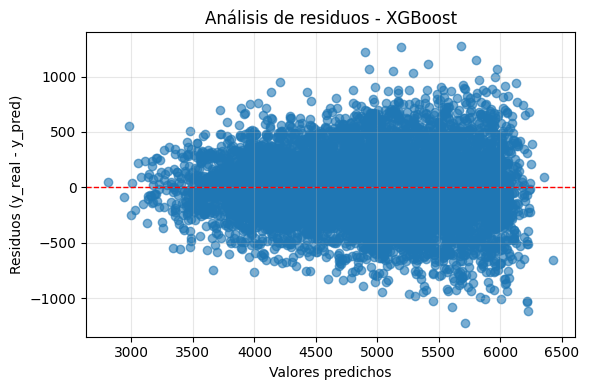

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3613
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 28
[LightGBM] [Info] Start training from score 4930.890040
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

D:\Trabajo\Trabajos Universitarios\Semestre_10\EFE_Inteligencia_Artificial\Lab_1_Magna\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


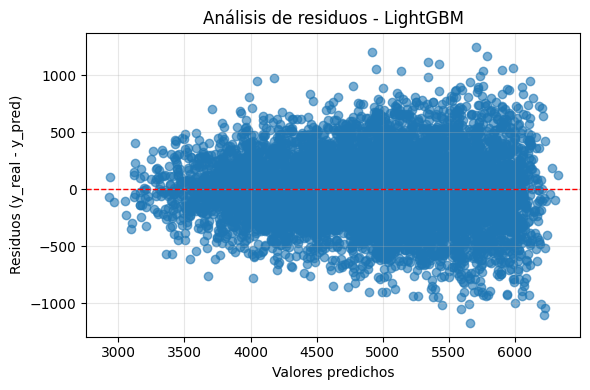

💾 Modelo guardado en: modelos/CatBoost.joblib
Modelo moderno 'CatBoost' evaluado.


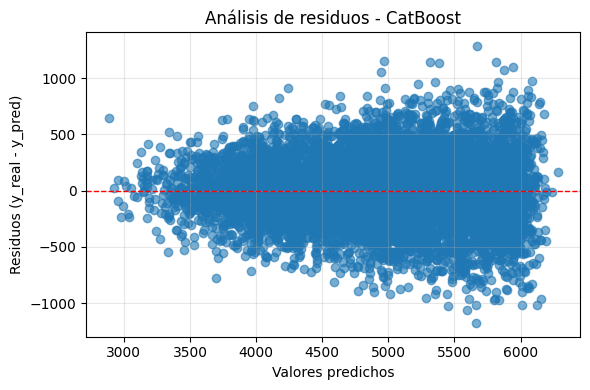

✅ Resultados, modelos y gráficos de residuos guardados.


D:\Trabajo\Trabajos Universitarios\Semestre_10\EFE_Inteligencia_Artificial\Lab_1_Magna\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔹 Calculando importancia de features con SHAP para XGBoost...


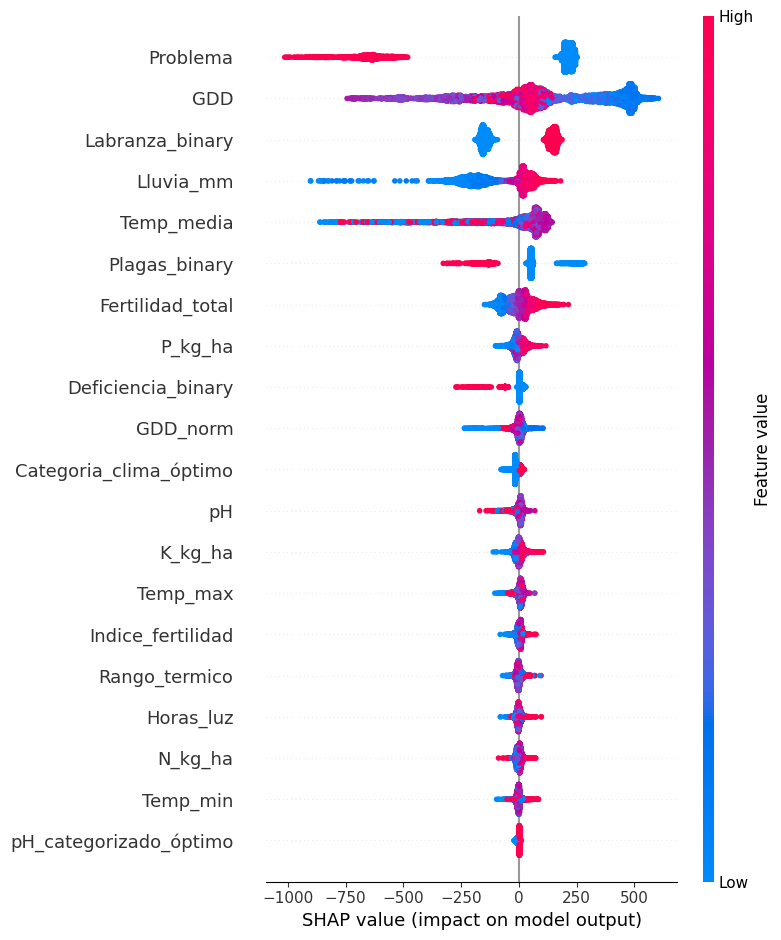

✅ Ranking de importancia de features para XGBoost guardado en 'csv/feature_importance_XGBoost.csv'
🔹 Calculando importancia de features con SHAP para LightGBM...


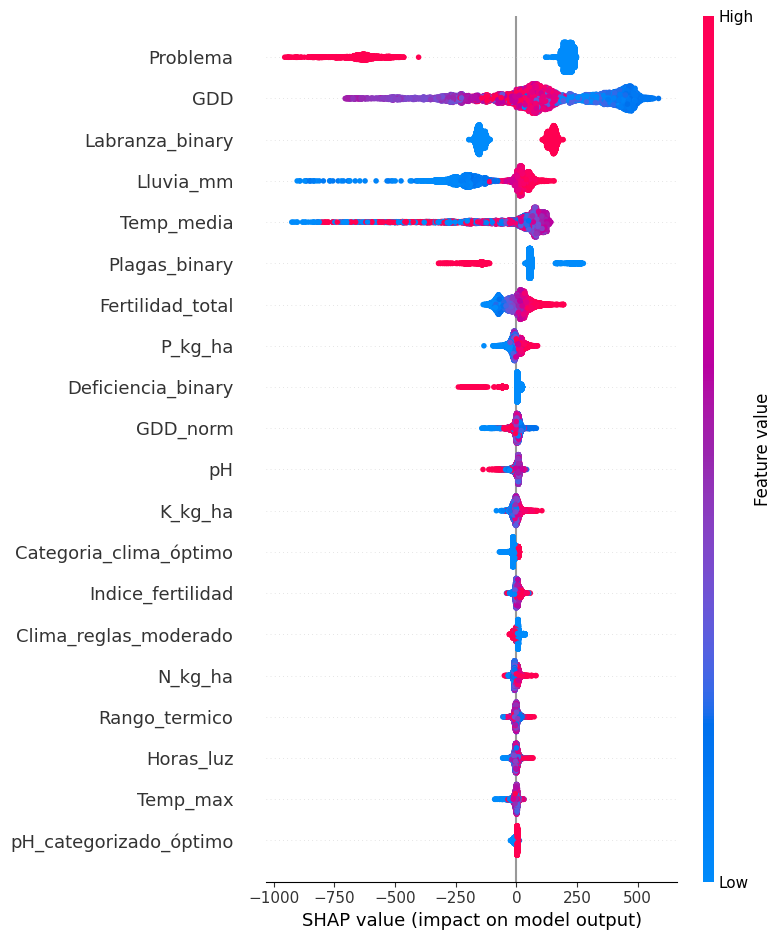

✅ Ranking de importancia de features para LightGBM guardado en 'csv/feature_importance_LightGBM.csv'
🔹 Calculando importancia de features con SHAP para CatBoost...


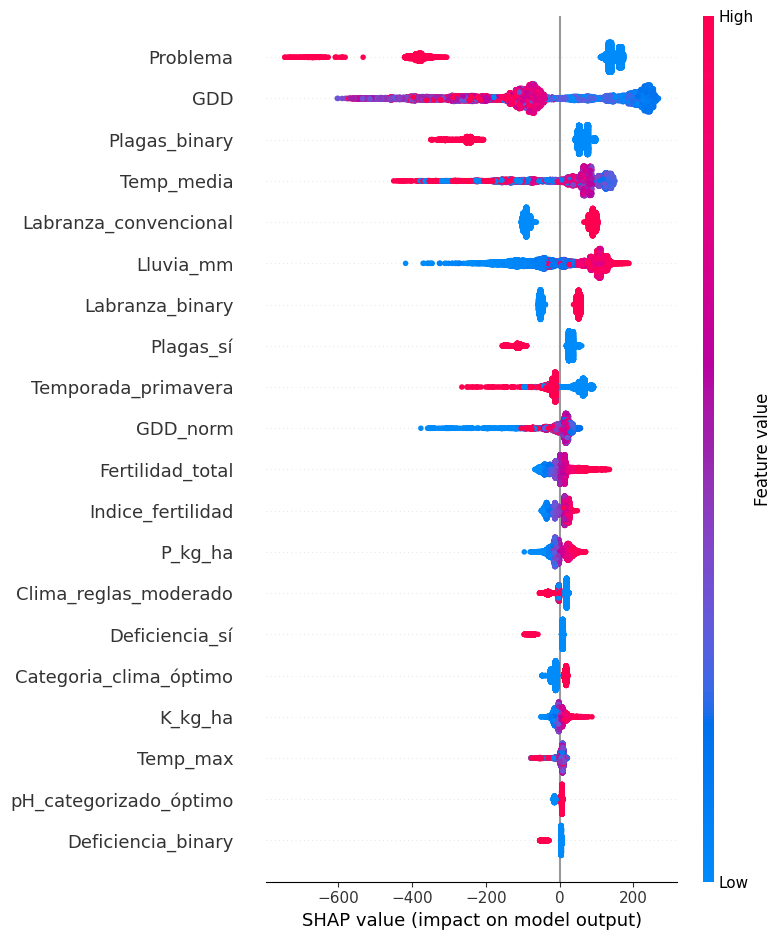

✅ Ranking de importancia de features para CatBoost guardado en 'csv/feature_importance_CatBoost.csv'


In [1]:
# ===========================
# Entrenamiento y guardado de métricas de Modelos Modernos + Análisis de Residuos
# ===========================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import os
import joblib  # Para guardar modelos y scaler

# Modelos modernos
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# ===========================
# 1. Cargar dataset desde la carpeta 'csv'
# ===========================
csv_path = os.path.join('csv', 'features_trigo.csv')
df = pd.read_csv(csv_path)
print("✅ Dataset 'features_trigo.csv' cargado desde la carpeta 'csv'.")

# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Features y target
X = df_encoded.drop("Rendimiento_kg_ha", axis=1)
y = df_encoded["Rendimiento_kg_ha"]

# División 70/15/15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Crear carpetas si no existen
os.makedirs("modelos", exist_ok=True)
os.makedirs("images", exist_ok=True)

# Guardar el scaler
scaler_filename = "modelos/scaler_modernos.joblib"
joblib.dump(scaler, scaler_filename)
print(f"💾 StandardScaler guardado en: {scaler_filename}")

# ===========================
# 2. Definir modelos modernos
# ===========================
modelos_modernos = {
    "XGBoost": xgb.XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        random_state=42,
        eval_metric="rmse"
    ),
    "LightGBM": lgb.LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        random_state=42
    ),
    "CatBoost": CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        random_state=42,
        verbose=0
    )
}

# ===========================
# 3. Entrenar, evaluar y guardar métricas
# ===========================
resultados = []

for nombre, modelo in modelos_modernos.items():
    # Entrenar modelo
    modelo.fit(X_train_scaled, y_train)
    
    # Guardar modelo entrenado
    modelo_filename = f"modelos/{nombre}.joblib"
    joblib.dump(modelo, modelo_filename)
    print(f"💾 Modelo guardado en: {modelo_filename}")
    
    # Predicciones
    y_pred = modelo.predict(X_test_scaled)
    
    # Métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    
    resultados.append({
        "Modelo": nombre,
        "R²": r2,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })
    
    print(f"Modelo moderno '{nombre}' evaluado.")
    
    # ===========================
    # Análisis de Residuos
    # ===========================
    residuos = y_test - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuos, alpha=0.6)
    plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
    plt.title(f"Análisis de residuos - {nombre}")
    plt.xlabel("Valores predichos")
    plt.ylabel("Residuos (y_real - y_pred)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    # Guardar gráfico
    plt.savefig(f"images/residuos_{nombre}.png", dpi=120)
    plt.show()

# ===========================
# 4. Guardar resultados en CSV
# ===========================
resultados_df = pd.DataFrame(resultados)
resultados_df.to_csv("csv/resultados_modelos_modernos.csv", index=False)
print("✅ Resultados, modelos y gráficos de residuos guardados.")

# =================================================================
# 5. Importancia de features con SHAP para modelos modernos
# =================================================================
import shap

# Crear carpeta csv si no existe
os.makedirs("csv", exist_ok=True)

for nombre, modelo in modelos_modernos.items():
    print(f"🔹 Calculando importancia de features con SHAP para {nombre}...")
    
    # Crear explainer
    if nombre == "XGBoost":
        explainer = shap.Explainer(modelo)
    elif nombre == "LightGBM":
        explainer = shap.Explainer(modelo)
    elif nombre == "CatBoost":
        explainer = shap.Explainer(modelo)
    
    # Calcular valores SHAP
    shap_values = explainer(X_test_scaled)
    
    # Gráfico summary (global)
    # Se puede mostrar en consola sin guardar para evitar problemas de imagen
    shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=True)
    
    # Ranking de features por importancia media absoluta
    feature_importance = pd.DataFrame({
        "Feature": X.columns,
        "Importance": np.abs(shap_values.values).mean(axis=0)
    }).sort_values(by="Importance", ascending=False)
    
    # Guardar ranking en CSV
    feature_importance.to_csv(f"csv/feature_importance_{nombre}.csv", index=False)
    print(f"✅ Ranking de importancia de features para {nombre} guardado en 'csv/feature_importance_{nombre}.csv'")


Los gráficos de residuos de los modelos de boosting (XGBoost, LightGBM y CatBoost) muestran un patrón de heterocedasticidad: la dispersión de los residuos aumenta a medida que los valores predichos crecen, formando un embudo o cono. Esto indica que la varianza de los errores no es constante, y que las predicciones son menos confiables para rendimientos altos.

En comparación con Random Forest y KNN, cuyos residuos se distribuyen de manera más aleatoria y homogénea, los modelos de boosting presentan un sesgo más pronunciado en los rangos superiores, sugiriendo menor consistencia en las predicciones para valores altos.

Aunque los modelos de boosting son potentes y suelen ofrecer alto desempeño, en este conjunto de datos su heterocedasticidad hace que Random Forest y KNN sean más robustos en términos de distribución de errores y estabilidad predictiva en todo el rango de rendimientos.

# Análisis Comparativo de Modelos - SHAP Summary Plots

## Resumen Ejecutivo

Los tres modelos de Machine Learning (XGBoost, LightGBM y CatBoost) muestran consistencia en identificar las variables más importantes, aunque con diferencias en la importancia relativa y el rango de impactos. La variable "Problema" emerge como el factor más crítico en los tres algoritmos.

---

## Comparativa Detallada por Modelo

### XGBoost
**Rango SHAP:** -1000 a +500

**Top 5 Variables:**
1. Problema - Impacto dominante
2. GDD - Variable climática clave
3. Labranza_binary - Práctica de manejo crítico
4. Lluvia_mm - Factor hídrico importante
5. Temp_media - Variable térmica esencial

**Características distintivas:**
- Mayor rango de valores SHAP
- Enfoque balanceado entre variables climáticas y de manejo
- Labranza_binary como tercera variable más importante

### LightGBM
**Rango SHAP:** -1000 a -250 (aparentemente más concentrado)

**Top 5 Variables:**
1. Problema - Consistente posición 1
2. GDD - Mantiene posición 2
3. Labranza_binary - Similar a XGBoost
4. Lluvia_mm - Misma posición
5. Temp_media - Completa top 5 idéntico

**Características distintivas:**
- Incluye Clima_reglas_moderado como variable nueva
- Patrón muy similar a XGBoost en ranking superior
- Ligera variación en variables de menor importancia

### CatBoost
**Rango SHAP:** -600 a +200 (más conservador)

**Top 5 Variables:**
1. Problema - Posición 1 consistente
2. GDD - Posición 2 mantenida
3. Plagas_binary - Ascenso significativo (posición 3 vs 5 en otros)
4. Temp_media - Posición 4 consistentemente
5. Labranza_convencional - Nueva en top 5

**Características distintivas:**
- Mayor sensibilidad a variables categóricas
- Plagas_binary gana importancia relativa
- Diferenciación explícita de tipos de labranza
- Rango de impacto más estrecho

---

## Hallazgos Consistentes Entre Modelos

### Variables Críticas (Consenso en los 3 modelos)
1. Problema - Factor determinante en todos los algoritmos
2. GDD (Grados Día de Crecimiento) - Variable climática esencial
3. Temp_media - Importancia térmica consistente
4. Lluvia_mm - Factor hídrico crítico

### Variables con Variación Significativa
- Plagas_binary: Posición 5 en XGBoost/LightGBM vs posición 3 en CatBoost
- Labranza_convencional: Emerge en top 5 solo en CatBoost
- Labranza_binary: Posición 3 en primeros modelos vs posición 7 en CatBoost

### Patrones Climáticos Consistentes
- Variables relacionadas con temperatura (GDD, Temp_media) en top 5
- Lluvia como factor hídrico crítico
- Variables climáticas muestran efectos mixtos (positivos/negativos)

---

## Análisis de Robustez del Modelo

### Fortalezas Identificadas
1. Consistencia en variables top entre diferentes algoritmos
2. Validación cruzada de resultados importantes
3. Variables climáticas identificadas como críticas en todos los modelos
4. "Problema" confirmado como factor determinante

### Consideraciones Específicas por Algoritmo
- XGBoost: Buen balance general, rango amplio de impactos
- LightGBM: Similar a XGBoost, eficiente computacionalmente
- CatBoost: Superior con variables categóricas, más conservador en predicciones

---

## Recomendaciones Generales

### Para Monitoreo y Seguimiento
1. Enfocar recursos en las variables top 5 consistentes
2. Priorizar el entendimiento y definición de "Problema"
3. Monitorear continuamente variables climáticas (GDD, temperatura, lluvia)

### Para Mejora del Modelo
1. Validar definición de "Problema" por ser la variable más influyente
2. Investigar interacciones entre variables climáticas y de manejo
3. Considerar CatBoost cuando hay variables categóricas complejas
4. Evaluar ensemble que combine fortalezas de los tres algoritmos

### Para Toma de Decisiones
1. Variables climáticas son drivers principales - considerar en planificación
2. Prácticas de labranza tienen impacto significativo - optimizar estrategias
3. Control de plagas crítico según CatBoost - reforzar monitoreo

# Análisis Comparativo de Modelos - SHAP Summary Plots

## Resumen Ejecutivo

Los tres modelos de Machine Learning (XGBoost, LightGBM y CatBoost) muestran consistencia en identificar las variables más importantes, aunque con diferencias en la importancia relativa y el rango de impactos. La variable "Problema" emerge como el factor más crítico en los tres algoritmos.

---

## Comparativa Detallada por Modelo

### XGBoost
**Rango SHAP:** -1000 a +500

**Top 5 Variables:**
1. Problema - Impacto dominante
2. GDD - Variable climática clave
3. Labranza_binary - Práctica de manejo crítico
4. Lluvia_mm - Factor hídrico importante
5. Temp_media - Variable térmica esencial

**Características distintivas:**
- Mayor rango de valores SHAP
- Enfoque balanceado entre variables climáticas y de manejo
- Labranza_binary como tercera variable más importante

### LightGBM
**Rango SHAP:** -1000 a -250 (aparentemente más concentrado)

**Top 5 Variables:**
1. Problema - Consistente posición 1
2. GDD - Mantiene posición 2
3. Labranza_binary - Similar a XGBoost
4. Lluvia_mm - Misma posición
5. Temp_media - Completa top 5 idéntico

**Características distintivas:**
- Incluye Clima_reglas_moderado como variable nueva
- Patrón muy similar a XGBoost en ranking superior
- Ligera variación en variables de menor importancia

### CatBoost
**Rango SHAP:** -600 a +200 (más conservador)

**Top 5 Variables:**
1. Problema - Posición 1 consistente
2. GDD - Posición 2 mantenida
3. Plagas_binary - Ascenso significativo (posición 3 vs 5 en otros)
4. Temp_media - Posición 4 consistentemente
5. Labranza_convencional - Nueva en top 5

**Características distintivas:**
- Mayor sensibilidad a variables categóricas
- Plagas_binary gana importancia relativa
- Diferenciación explícita de tipos de labranza
- Rango de impacto más estrecho

---

## Hallazgos Consistentes Entre Modelos

### Variables Críticas (Consenso en los 3 modelos)
1. Problema - Factor determinante en todos los algoritmos
2. GDD (Grados Día de Crecimiento) - Variable climática esencial
3. Temp_media - Importancia térmica consistente
4. Lluvia_mm - Factor hídrico crítico

### Variables con Variación Significativa
- Plagas_binary: Posición 5 en XGBoost/LightGBM vs posición 3 en CatBoost
- Labranza_convencional: Emerge en top 5 solo en CatBoost
- Labranza_binary: Posición 3 en primeros modelos vs posición 7 en CatBoost

### Patrones Climáticos Consistentes
- Variables relacionadas con temperatura (GDD, Temp_media) en top 5
- Lluvia como factor hídrico crítico
- Variables climáticas muestran efectos mixtos (positivos/negativos)

---

## Análisis de Robustez del Modelo

### Fortalezas Identificadas
1. Consistencia en variables top entre diferentes algoritmos
2. Validación cruzada de resultados importantes
3. Variables climáticas identificadas como críticas en todos los modelos
4. "Problema" confirmado como factor determinante

### Consideraciones Específicas por Algoritmo
- XGBoost: Buen balance general, rango amplio de impactos
- LightGBM: Similar a XGBoost, eficiente computacionalmente
- CatBoost: Superior con variables categóricas, más conservador en predicciones

---

## Recomendaciones Generales

### Para Monitoreo y Seguimiento
1. Enfocar recursos en las variables top 5 consistentes
2. Priorizar el entendimiento y definición de "Problema"
3. Monitorear continuamente variables climáticas (GDD, temperatura, lluvia)

### Para Mejora del Modelo
1. Validar definición de "Problema" por ser la variable más influyente
2. Investigar interacciones entre variables climáticas y de manejo
3. Considerar CatBoost cuando hay variables categóricas complejas
4. Evaluar ensemble que combine fortalezas de los tres algoritmos

### Para Toma de Decisiones
1. Las variables climáticas son los factores que más influyen en el modelo - considerar en planificación
2. Prácticas de labranza tienen impacto significativo - optimizar estrategias
3. Control de plagas crítico según CatBoost - reforzar monitoreo